 **Import Libraries**

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


**Load data and explore**

In [44]:
#import data and store it in a dataframe
data = pd.read_csv('train.csv')

In [45]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

**Data preprocessing**

Since all values are non-null we don't need to take care of missing values.

We need to encode the categorical data to numerical

In [48]:
#create encoder
encoder = LabelEncoder()
obj_columns = data.dtypes == 'object' #create boolean with object type = true
obj_indexes =  obj_columns.index[obj_columns] #store indexes of object columns
#convert columns with object type to numerical with encoder by column
for index in obj_indexes: 
  data[index] = encoder.fit_transform(data[index].astype(str))
#check dataframe for transformations
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


Now that all features are numerical, we can start some feature engineering:


In [ ]:
#we can merge values from different times of day to obtain the net values
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
data['total_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']

**Data exploration & visualization**

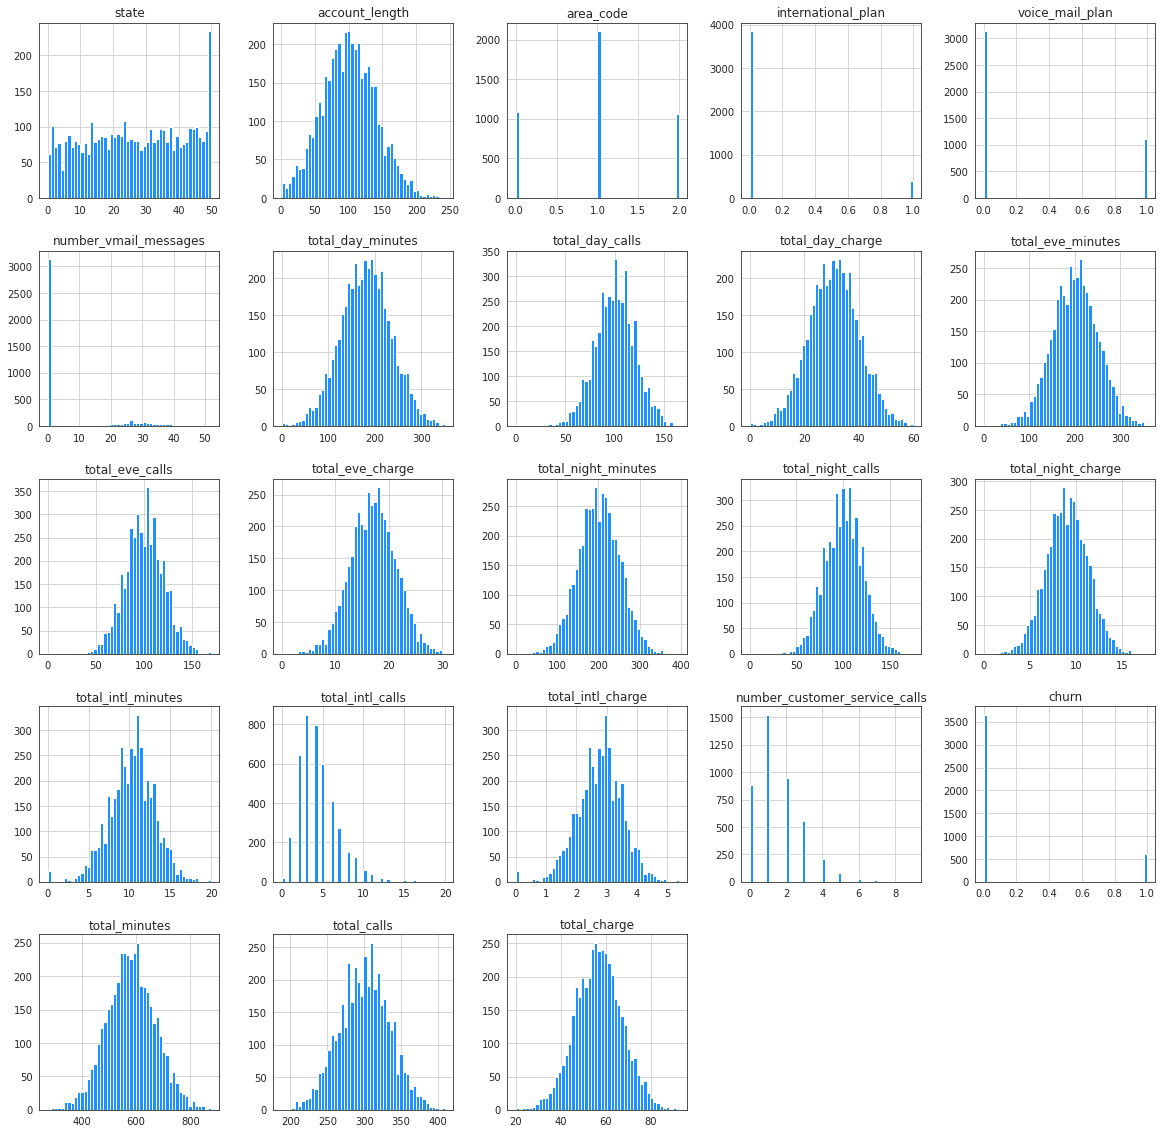

In [52]:
sns.set_style('white')
data.hist(bins=50,figsize=(20,20),color='dodgerblue');

**Correlation analysis**

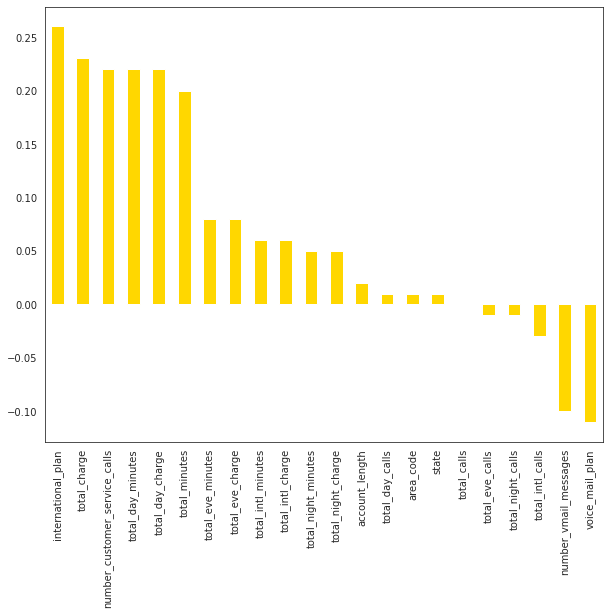

In [55]:
ca = round(data.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='gold' , figsize = (10,8))
plt.show() 

From this we can see that International plan, Total charge, number of customer service calls, total day minutes, total day charge and total minutes (day+eve+night), are the ones that are highly correlated with the target variable (churn). By contrast, account length, total day calls, state, total calls, total eve calls, total night calls and total international calls have no correlation with churn and are less likely to be features that may help the prediction.

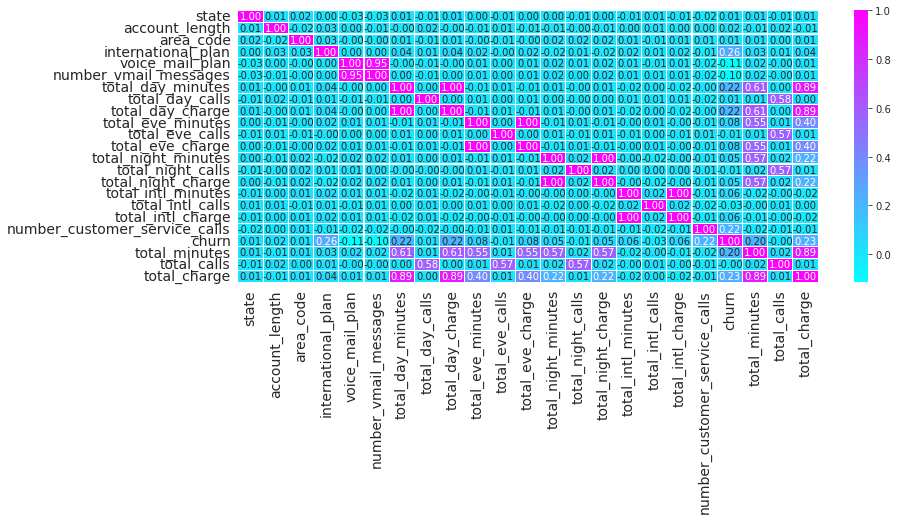

In [61]:
#another way of visualizing it is with the heatmap
fig = plt.subplots(figsize=[13,5])
sns.heatmap(data.corr(),  annot=True, linewidths=0.05, fmt= '.2f',cmap='cool')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show() 

**Split dataset Train-Test**

In [91]:
#split the data into train and test subsets
train, test = train_test_split(data, test_size=0.30)
print ('Train set:', train.shape)
print ('Val set:', test.shape)

Train set: (2975, 23)
Val set: (1275, 23)


In [92]:
#first we must store the column corresponding to the target variable (churn) as labels
train_labels = train['churn']
test_labels = test['churn']

#then we remove them from dataferame
train = train.drop('churn',  axis = 1)
print(train.shape)
test = test.drop('churn', axis = 1)
print(test.shape)
#lets see how is the distribution of churn feature
train_labels.value_counts()

(2975, 22)
(1275, 22)


0    2557
1     418
Name: churn, dtype: int64

As we can see, there is a big **imbalance** in the two classes, since there are way more cases of retaining (0) than churn (1). We can adress this by SMOTE ('Synthetic Minority Oversampling Technique')


In [93]:
balance = SMOTE(sampling_strategy='auto')
train, train_labels = balance.fit_resample(train, train_labels)

train_labels.value_counts()

0    2557
1    2557
Name: churn, dtype: int64

After balancing classes in the target variable, we can start to **train and test different models**

Logistic regression

In [ ]:
logReg